In [378]:
import time
import numpy as np
import pandas as pd
import pickle
import spacy
from sklearn.decomposition import PCA

In [2]:
import plotly
import plotly.graph_objs as go

In [290]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits import mplot3d
from matplotlib.patches import Circle

In [79]:
import seaborn as sns
rcParams['font.sans-serif'].insert(0, 'Arial')
rcParams['font.family'] = 'sans-serif'
sns.set_context('paper')
sns.set(style='darkgrid', font='Arial')

In [470]:
#! pip install adjustText

### Plots

In [336]:
# change these to the appropriate data folder
data_folder = '/media/siri/78C6823EC681FD1E/minio/data/dq-data/'
input_folder = '/media/siri/78C6823EC681FD1E/minio/data/dq-data/'
dl_folder = '/media/siri/78C6823EC681FD1E/minio/data/dq-data/dl/'

In [5]:
X1 = pickle.load(open(data_folder+'d2v_1_10_train_svd_red.p', 'rb'))

In [6]:
X2 = pickle.load(open(data_folder+'d2v_2_10_train_svd_red.p', 'rb'))

In [7]:
X_train = pickle.load(open(data_folder+'X_train.p', 'rb'))

In [8]:
X_train.head()

,qid1,qid2,question1,question2
id,,,,
186150,284024,284025,"What is the difference between ""visa on arriva...",Do I need a visa to visit Ireland from England?
208652,312703,312704,What are the chances of receiving invitation t...,What are the chances of receiving invitation t...
268163,385651,385652,"Is the phrase ""the pressure in an incompressib...",What is the use of Bash in Windows?
155539,243655,243656,How do I buy goods from Amazon and ship to Vie...,How can I sell Vietnam traditional silk ties o...
212779,317931,317932,How do you read tarot cards?,How do I read tarot cards?


In [ ]:
#! pip install plotly

In [437]:
def make_3d_scatter(X, numrows, col1=0, col2=1, col3=3, hue_col=None, figsize=(8, 3), view_init=(30, 60), point_size=2):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(view_init[0], azim=view_init[1])
    X_ = X.sample(numrows)
    if hue_col:
        pal = {'yes':'#3498db', 'no':'#e74c3c'}
        color = X_[hue_col].apply(lambda x: pal[x])
        # Data for three-dimensional scattered points
        ax.scatter3D(
            X_[col1],
            X_[col2],
            X_[col3], c=color, s=point_size)
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_zlabel(col3)
        h, l = ax.get_legend_handles_labels()
        patches = []
        for i in pal:
            patches.append(Circle((0,0),1,fc=pal[i]))
        #plt.legend(recs,classes,loc=4)
        ax.legend(patches,pal.keys(), ncol=1, loc="upper left", frameon=True, title=hue_col)
    else:
        ax.scatter3D(
            X_[col1],
            X_[col2],
            X_[col3], s=point_size)

In [464]:
def make_seaborn_2d_scatter(data, col1, col2, hue_col, desc, filename, numrows=10, random_state=None):
    if random_state:
        df = data.sample(numrows, random_state=random_state)
    else:
        df = data.sample(numrows)
    desc = desc[desc.index.isin(df.index)]
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x=col1, y=col2, hue=hue_col, data=df, s=5, linewidth=0, ax=ax)

In [466]:
def make_seaborn_catplot(data, col1, cat_col, desc, filename, numrows=10, random_state=None):
    if random_state:
        df = data.sample(numrows, random_state=random_state)
    else:
        df = data.sample(numrows)
    desc = desc[desc.index.isin(df.index)]
    pal = {'yes':'#3498db', 'no':'#e74c3c'} 
    sns.catplot(x=col1, y=cat_col, hue=cat_col, palette=pal, kind='box',data=df)

In [457]:
from matplotlib.ticker import ScalarFormatter
def bar_plot_maker(data, value_col, name_col, hue_col, label, title, logscale=False, 
                   xticks=None, xticklabels=None, figsize=(7,10), numrows=10, random_state=None):
    f, ax = plt.subplots(figsize=figsize)
    # Plot variances
    pal = {'yes':'#3498db', 'no':'#e74c3c'}
    if random_state:
        df = data.sample(numrows, random_state=random_state)
    else:
        df = data.sample(numrows)
    ax = sns.barplot(x=value_col, y=name_col, hue= hue_col,
                data=df, dodge=False,palette=pal, hue_order=['yes', 'no'])
                #label=label, color="b")
        
   

    # Add a legend and informative axis label
    ax.legend(ncol=1, loc="upper left", frameon=True, title=hue_col)
    if logscale:
        ax.set(ylabel="", title=title, xscale='log')#, xticks=xticks, xticklabels=xticklabels)
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
    elif xticks and xticklabels:        
        ax.set(ylabel="", title=title, xticks=xticks, xticklabels=xticklabels)
    else:       
        ax.set(ylabel="", title=title)   
        
         
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.invert_xaxis()  # labels read top-to-bottom
    ax.yaxis.tick_right()
    ax.tick_params(labelsize=8)
    sns.despine(left=True, bottom=True)

In [ ]:
make_plotly_3d_scatter(X1, X_train['question1'].values, 'd2v_1_10_train_svd_3D_plot')

In [ ]:
make_plotly_3d_scatter(X2, X_train['question2'].values, 'd2v_2_10_train_svd_3D_plot')

In [314]:
X1_umap = pickle.load(open(data_folder+'d2v_1_10_train_red.p', 'rb'))

In [315]:
X2_umap = pickle.load(open(data_folder+'d2v_2_10_train_red.p', 'rb'))

In [351]:
y_train = pickle.load(open(input_folder+'y_train.p', 'rb'))
y_train = y_train.astype(int)
y_train.replace((1, 0), ('yes', 'no'), inplace=True)
y_train.describe()

count     270872
unique         2
top           no
freq      170757
Name: is_duplicate, dtype: object

### Word Embedding Plots

In [337]:
w2v = pickle.load(open(dl_folder+'w2v.p', 'rb'))

In [338]:
w2v.shape

(1071072, 300)

In [370]:
nlp = spacy.load('en_vectors_web_lg')

In [376]:
nlp.vocab.vectors.shape

(1070971, 300)

In [435]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, \
strip_multiple_whitespaces, remove_stopwords, stem_text
from adjustText import adjust_text
custom_filters = [strip_tags, strip_punctuation, strip_multiple_whitespaces, remove_stopwords]
def get_tokenized_questions(X):
    series = pd.Series(pd.concat([X['question1'], X['question2']]),dtype=str)
    series.dropna()
    for question in series:
        yield preprocess_string(question, custom_filters)

def plot_w2v(X):
    # intialise pca model and tell it to project data down onto 2 dimensions
    sents = get_tokenized_questions(X)
    word_vectors = []
    words = []
    for sent in sents:
        # skip odd spaces from tokenizer
        for word in sent:
            token = nlp(word)
            if token.has_vector and token.vector_norm == 0:
                continue                
            if token.has_vector:
                if token.text not in words:
                    word_vectors.append(token.vector)
                    words.append(token.text)
    pca = PCA(n_components=2)
    # fit the pca model to our 300D data, this will work out which is the best 
    # way to project the data down that will best maintain the relative distances 
    # between data points. It will store these intructioons on how to transform the data.
    pca.fit(word_vectors)
    # Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
    # instructions it learnt during the fit phase.
    word_vecs_2d = pca.transform(word_vectors)
    # let's look at our new 2D word vectors
    df = pd.DataFrame(word_vecs_2d)
    # create a nice big plot 
    f, ax = plt.subplots(figsize=(12, 12))
    sns.despine(f, left=True, bottom=True)
    ax = sns.scatterplot(0, 1, data=df, s=20, ax=ax)
    # plot the scatter plot of where the words will be
    #plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
    # for each word and coordinate pair: draw the text on the plot
    texts = []
    font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 8,
        }
    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        texts.append(ax.text(x, y, word, fontdict=font))
        #ax.text(x, y, word, size= 10)
    adjust_text(texts)

### Words (from 20 questions in training set) embedded using pretrained GloVe model (dimension reduction by PCA)

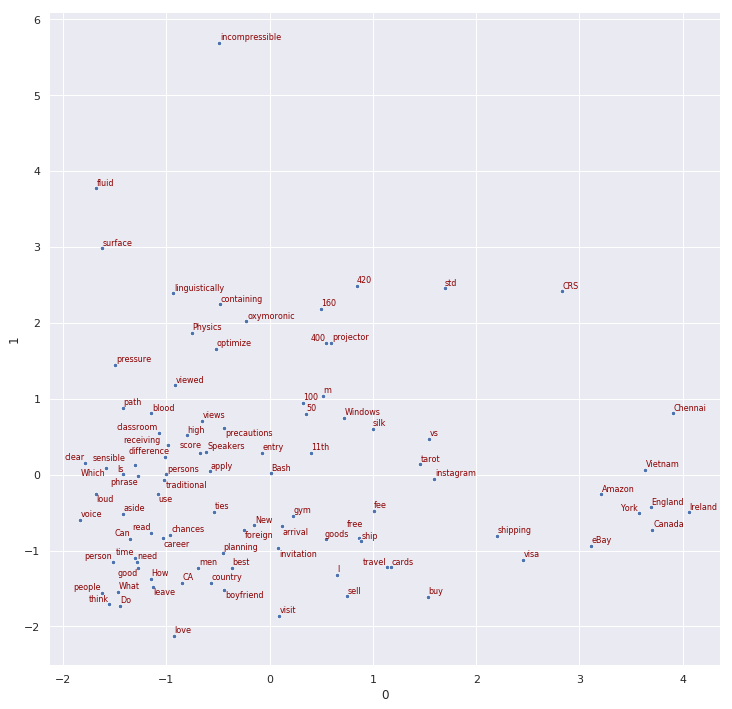

In [436]:
plot_w2v(X_train[:10])

In [ ]:
make_plotly_3d_scatter(X1_umap, X_train['question1'].values, 'd2v_1_10_train_umap_3D_plot')

In [ ]:
make_plotly_3d_scatter(X2_umap, X_train['question2'].values, 'd2v_2_10_train_umap_3D_plot')

### A much bigger sample of words embedded using pretrained GloVe model (no dimension reduction, only first 3 dimensions used)

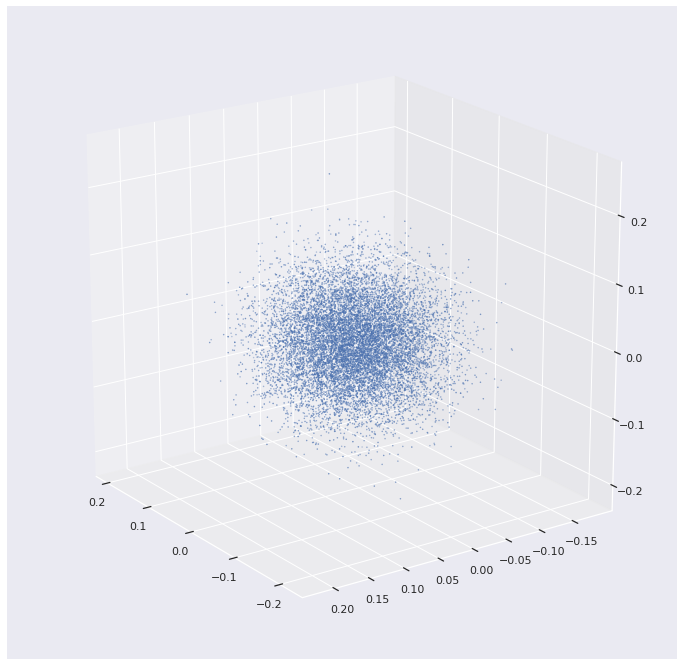

In [345]:
make_3d_scatter(pd.DataFrame(w2v), col1=1, col2=2, col3=3, 
                numrows=20000, figsize=(12,12), view_init=(20, 145), point_size=.25)

### Document vectors (question vectors) embedded using pretrained GloVe model (dimension reduction by UMAP)

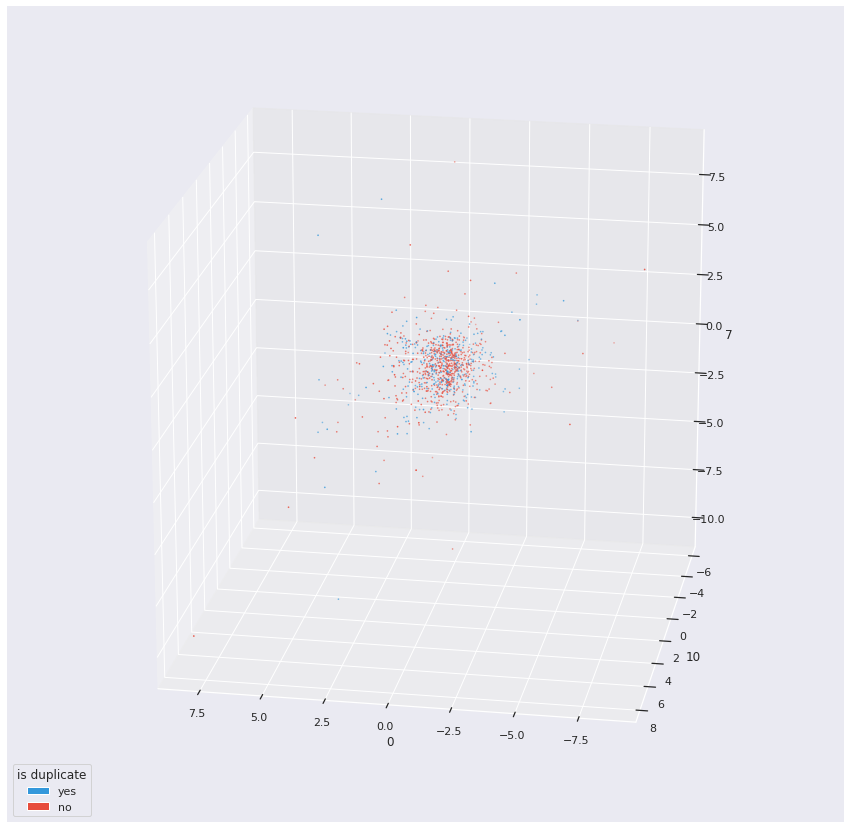

In [368]:
df = pd.DataFrame(np.hstack([X1_umap[:,:10], X2_umap[:,:10]]))
df['is duplicate'] = y_train
make_3d_scatter(df.dropna(), col1=0, col2=10, col3=7, hue_col= 'is duplicate',
                numrows=1000, figsize=(15,15), view_init=(20, 100), point_size=.5)

### Feature Comparison Plots

#### plots by cosine and hausdorff distance

In [10]:
X_cosine = pickle.load(open(data_folder+'cosine_train_w.p', 'rb'))

In [112]:
X_corr = pickle.load(open(data_folder+'correlation_train_w.p', 'rb'))

In [11]:
X_cityblock = pickle.load(open(data_folder+'cityblock_train_w.p', 'rb'))

In [12]:
X_haus = pickle.load(open(data_folder+'hausdorff_train_w.p', 'rb'))

In [13]:
X_sqeuclidean = pickle.load(open(data_folder+'sqeuclidean_train_w.p', 'rb'))

In [138]:
X_l1 = pickle.load(open(data_folder+'l1_train_w.p', 'rb'))

In [14]:
X_token_set_ratio = pickle.load(open(data_folder+'token_set_ratio_train.p', 'rb'))

In [106]:
X_token_sort_ratio = pickle.load(open(data_folder+'token_sort_ratio_train.p', 'rb'))

In [16]:
def break_text(text, max_length):  
    text = str(text)
    if len(text) > max_length:
        line1 = text[:max_length+1]+'\n'
        remaining_text = text[max_length+1:]
        return str(line1)+str(break_text(remaining_text, max_length))
    else:
        return text

In [98]:
X_desc = pd.DataFrame(np.array(['Q1: '+break_text(q1, 80)+
                                '\nQ2: '+break_text(q2, 80)
                                for q1, q2 in zip(X_train['question1'],X_train['question2'])]).reshape(-1,1),
                     columns=['questions'])
X_desc.head()

,questions
0,"Q1: What is the difference between ""visa on ar..."
1,Q1: What are the chances of receiving invitati...
2,"Q1: Is the phrase ""the pressure in an incompre..."
3,Q1: How do I buy goods from Amazon and ship to...
4,Q1: How do you read tarot cards?\nQ2: How do I...


In [205]:
X_featset1 = np.hstack((np.array(X_token_set_ratio).reshape(-1,1), 
                        np.array(X_token_sort_ratio).reshape(-1,1), 
                        np.array(X_cityblock).reshape(-1,1), 
                        np.array(X_haus).reshape(-1,1), 
                        np.array(X_sqeuclidean).reshape(-1,1), 
                        np.array(X_l1).reshape(-1,1), 
                        np.array(X_cosine).reshape(-1,1),  
                        np.array(X_corr).reshape(-1,1), 
                        np.array(y_train).reshape(-1,1)))
X_featset1.shape

(270872, 9)

In [206]:
X_featset1_df = pd.DataFrame(X_featset1, columns=['token set ratio', 'token sort ratio', 'cityblock', 
                                                  'hausdorff', 'sqeuclidean', 'l1',
                                                  'cosine', 'correlation', 'is duplicate'])
X_featset1_df['questions'] = X_desc
X_featset1_df.head()

,token set ratio,token sort ratio,cityblock,hausdorff,sqeuclidean,l1,cosine,correlation,is duplicate,questions
0,43.0,44.0,21.582061,1.615564,2.812752,21.582061,0.788286,0.788564,no,"Q1: What is the difference between ""visa on ar..."
1,99.0,99.0,36.693035,0.000000,12.287653,36.693035,0.674718,0.674567,no,Q1: What are the chances of receiving invitati...
2,42.0,25.0,27.440778,1.700451,5.198566,27.440778,0.939440,0.939968,no,"Q1: Is the phrase ""the pressure in an incompre..."
3,67.0,54.0,25.724087,1.885054,4.569174,25.724087,0.786592,0.786038,no,Q1: How do I buy goods from Amazon and ship to...
4,96.0,88.0,15.313459,0.000000,2.056757,15.313459,0.445017,0.446258,no,Q1: How do you read tarot cards?\nQ2: How do I...


In [228]:
X_featset1_df.dropna(inplace=True)

#### Composite feature vectors (using any 3 features from feature-sets 1 and 2 at a time)

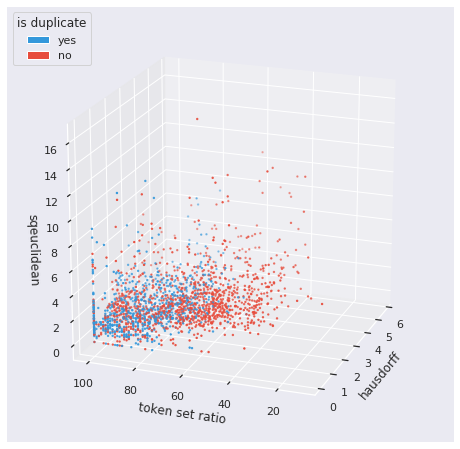

In [439]:
make_3d_scatter(X_featset1_df, numrows=2000, col1='hausdorff', col2='token set ratio', col3='sqeuclidean', 
                hue_col='is duplicate', figsize=(8,8), view_init=(20, 200))

#### Composite feature vectors (using any 2 features from feature-sets 1 and 2 at a time)

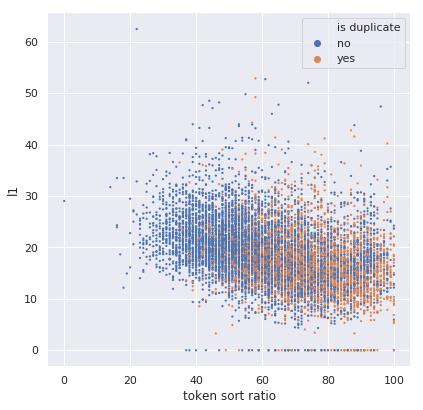

In [225]:
make_seaborn_2d_scatter(X_featset1_df, 'token sort ratio', 'l1', 'is duplicate',
                        X_desc, 'featset1_train_2D_plot', numrows=10000, random_state=36)

#### Feature box-plots (using any 1 feature from feature-sets 1 and 2 at a time)

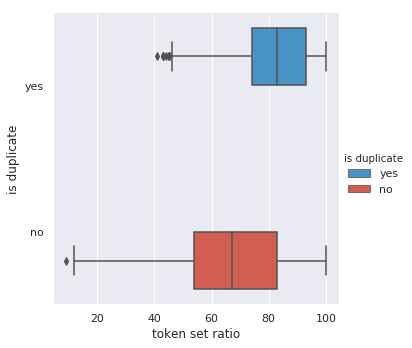

In [467]:
make_seaborn_catplot(X_featset1_df, 'token set ratio', 'is duplicate',
                        X_desc, 'featset1_train_2D_plot', numrows=20000, random_state=36)

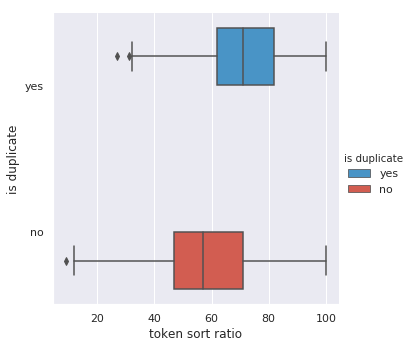

In [468]:
make_seaborn_catplot(X_featset1_df, 'token sort ratio', 'is duplicate',
                        X_desc, 'featset1_train_2D_plot', numrows=20000, random_state=36)

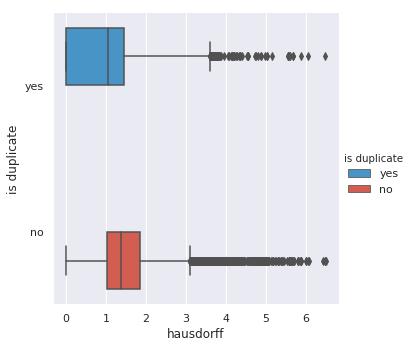

In [469]:
make_seaborn_catplot(X_featset1_df, 'hausdorff', 'is duplicate',
                        X_desc, 'featset1_train_2D_plot', numrows=20000, random_state=36)

#### Feature bar-plots (using any 1 feature from feature-sets 1 and 2 at a time)

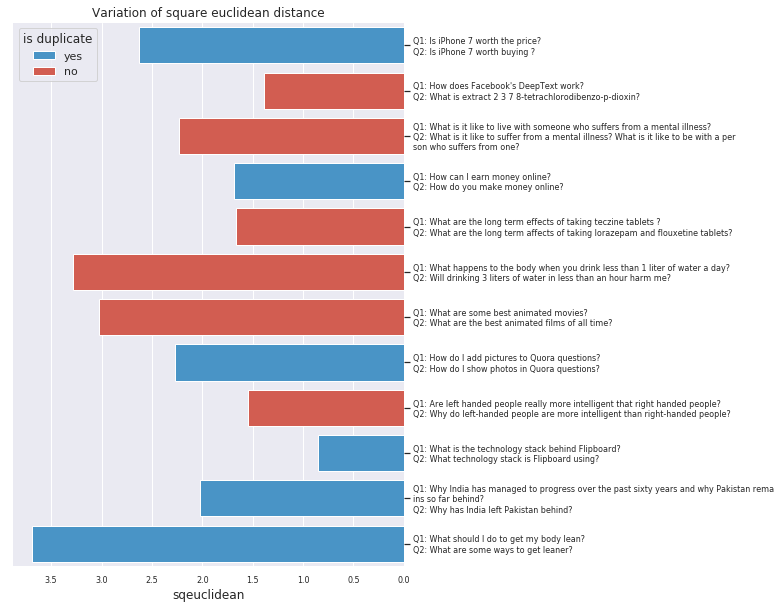

In [458]:
bar_plot_maker(X_featset1_df, value_col='sqeuclidean', name_col='questions', hue_col='is duplicate',
               label='sq. euclidean distance', title='Variation of square euclidean distance',
               #logscale=True, xticks=[0,2,4], xticklabels=['1','100','10000'],
               figsize=(7,10), numrows=12, random_state=42)

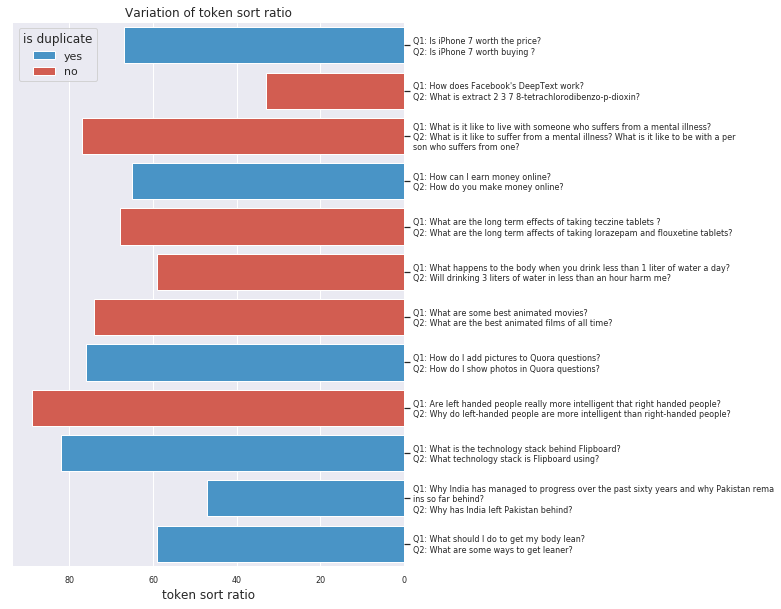

In [463]:
bar_plot_maker(X_featset1_df, value_col='token sort ratio', name_col='questions', hue_col='is duplicate',
               label='token sort ratio', title='Variation of token sort ratio',
               #logscale=True, xticks=[0,2,4], xticklabels=['1','100','10000'],
               figsize=(7,10), numrows= 12, random_state=42)

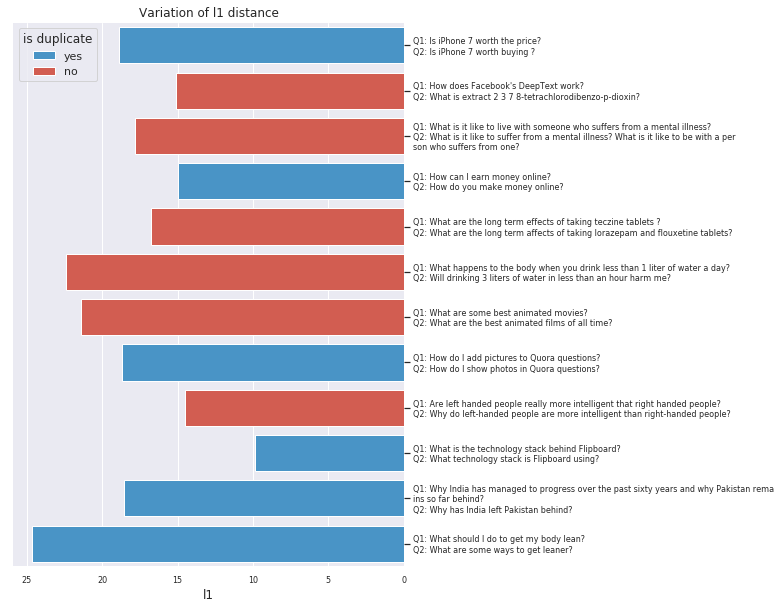

In [460]:
bar_plot_maker(X_featset1_df, value_col='l1', name_col='questions', hue_col='is duplicate',
               label='l1', title='Variation of l1 distance',
               #logscale=True, xticks=[0,2,4], xticklabels=['1','100','10000'],
               figsize=(7,10), numrows=12, random_state=42)

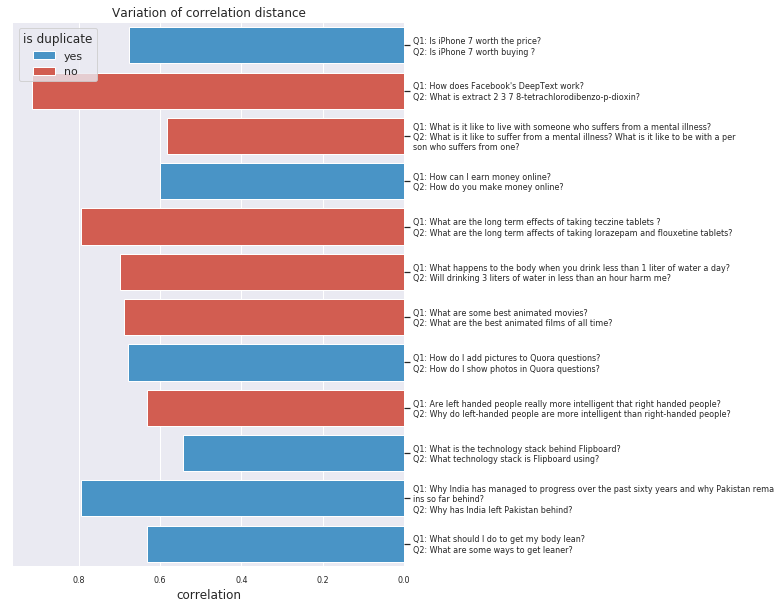

In [461]:
bar_plot_maker(X_featset1_df, value_col='correlation', name_col='questions', hue_col='is duplicate',
               label='correlation', title='Variation of correlation distance',
               #logscale=True, xticks=[0,2,4], xticklabels=['1','100','10000'],
               figsize=(7,10), numrows=12, random_state=42)